## Tugas 06 Data Mining

Nama: Muh. Yusuf Syam<br>
NIM: H071191044

<h1 align="center"> Image Preprocessing </h1><br>


Mengimport library yang dibutuhkan untuk image preprocessing

In [1]:
import cv2 as cv
from skimage import io
from PIL import Image
from matplotlib import pyplot as plt

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2

import numpy as np
import os

Import gambar dan menampilkannya

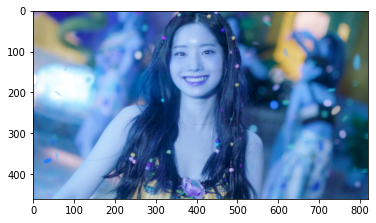

In [2]:
image = cv.imread('dahyun.png')

plt.imshow(image)

Karena format warna gambar masih berbentuk BGR, maka kita perlu mengkonversi gambarnya menjadi format RGB

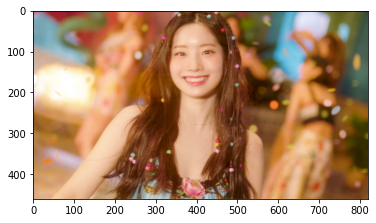

In [3]:
image_cvtresult = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_cvtresult)

Meng-split channel r, g, dan b lalu menampilkannya satu-satu

Text(0.5, 1.0, 'Blue Dahyun')

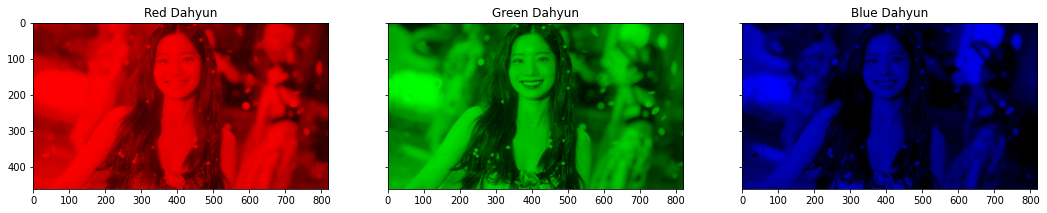

In [4]:
r, g, b= cv.split(image_cvtresult)
zeros= np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

fig, ax= plt.subplots(nrows= 1, ncols= 3, figsize=(18,8), sharey= True)

ax[0].imshow(cv.merge([r, zeros, zeros]))
ax[0].set_title('Red Dahyun')

ax[1].imshow(cv.merge([zeros, g, zeros]))
ax[1].set_title('Green Dahyun')

ax[2].imshow(cv.merge([zeros, zeros, b]))
ax[2].set_title('Blue Dahyun')

Menampilkan tampilan array dari image_cvtresult

In [5]:
image_array = img_to_array(image_cvtresult)

print(image_array)

[[[157.  27.  75.]
  [159.  30.  77.]
  [161.  34.  81.]
  ...
  [ 50.  72.  56.]
  [ 49.  71.  55.]
  [ 49.  71.  55.]]

 [[158.  35.  82.]
  [160.  38.  84.]
  [164.  42.  87.]
  ...
  [ 50.  72.  56.]
  [ 49.  71.  55.]
  [ 49.  71.  55.]]

 [[164.  50.  92.]
  [164.  52.  93.]
  [168.  56.  97.]
  ...
  [ 50.  72.  56.]
  [ 49.  71.  55.]
  [ 49.  71.  55.]]

 ...

 [[214. 168. 120.]
  [214. 169. 121.]
  [215. 170. 121.]
  ...
  [137.  84.  35.]
  [136.  83.  34.]
  [136.  83.  34.]]

 [[214. 169. 121.]
  [214. 170. 121.]
  [215. 170. 121.]
  ...
  [136.  83.  34.]
  [133.  81.  32.]
  [133.  81.  31.]]

 [[215. 170. 121.]
  [215. 170. 121.]
  [215. 170. 120.]
  ...
  [135.  83.  34.]
  [133.  81.  31.]
  [132.  80.  30.]]]


Menampilkan 4 citra dengan format GBR, RGB, greyscale, serta HSV

<function matplotlib.pyplot.show(close=None, block=None)>

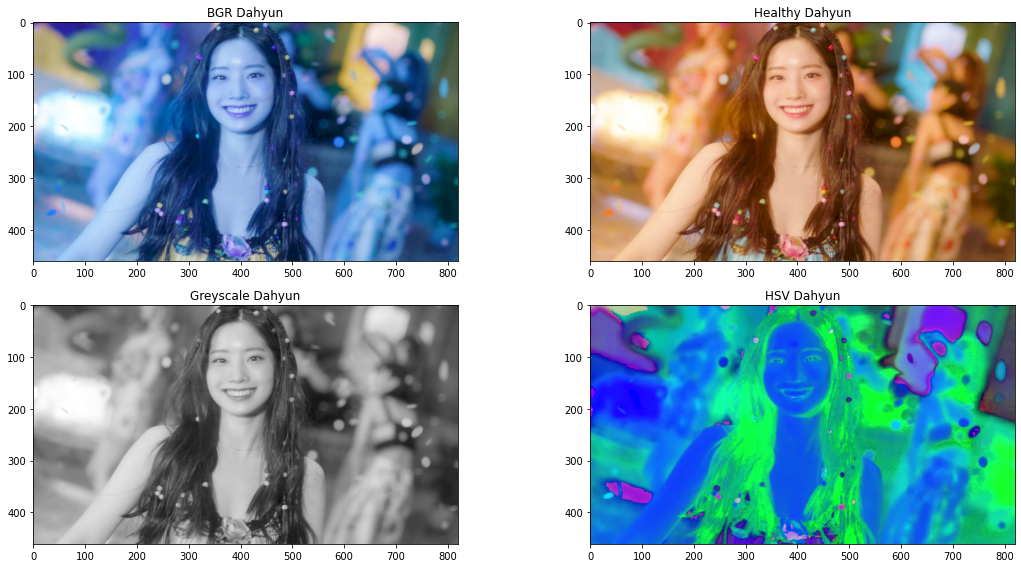

In [7]:
fig = plt.figure(num = None, figsize=(16, 8))

image_grayscale_temp = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_grayscale = cv.cvtColor(image_grayscale_temp, cv. COLOR_GRAY2RGB)

image_hsv = cv.cvtColor(image_cvtresult, cv.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.title('BGR Dahyun')
plt.imshow(image)

ax = fig.add_subplot(2, 2, 2)
plt.title('Healthy Dahyun')
plt.imshow(image_cvtresult)

ax = fig.add_subplot(2, 2, 3)
plt.title('Greyscale Dahyun')
plt.imshow(image_grayscale)

ax = fig.add_subplot(2, 2, 4)
plt.title('HSV Dahyun')
plt.imshow(image_hsv)

plt.tight_layout()
plt.show

Menampilkan 4 histogram citra tersebut

<function matplotlib.pyplot.show(close=None, block=None)>

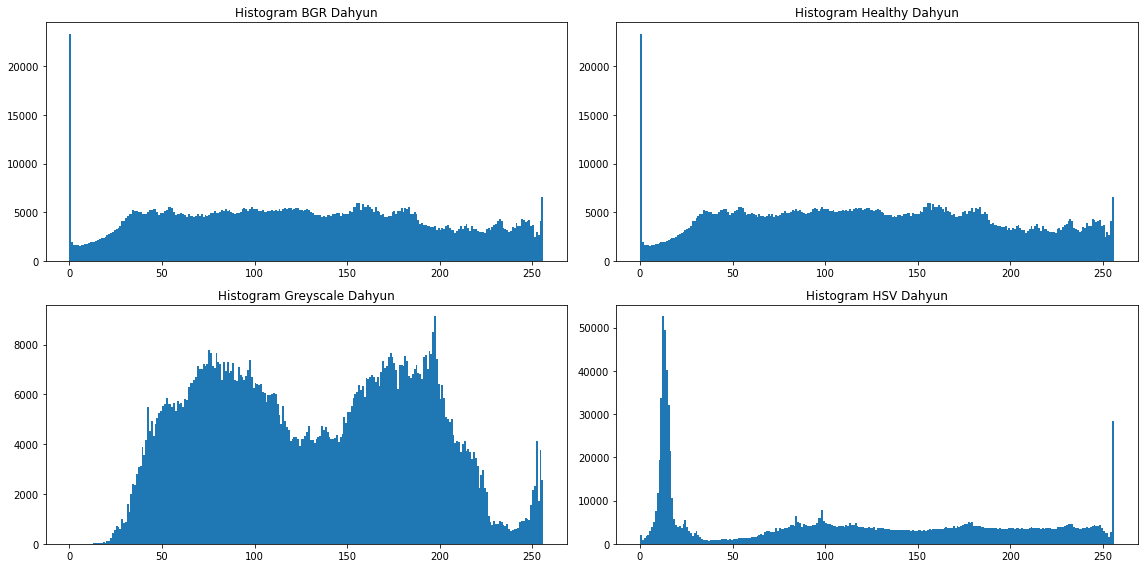

In [8]:
fig = plt.figure(num = None, figsize=(16, 8))

image_grayscale_temp = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_grayscale = cv.cvtColor(image_grayscale_temp, cv. COLOR_GRAY2RGB)

image_hsv = cv.cvtColor(image_cvtresult, cv.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.title('Histogram BGR Dahyun')
plt.hist(image.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 2)
plt.title('Histogram Healthy Dahyun')
plt.hist(image_cvtresult.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 3)
plt.title('Histogram Greyscale Dahyun')
plt.hist(image_grayscale.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 4)
plt.title('Histogram HSV Dahyun')
plt.hist(image_hsv.ravel(),256,[0,256])

plt.tight_layout()
plt.show

Resize citra

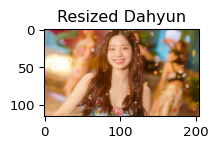

In [9]:
image_resize = cv.resize(image_cvtresult, (image.shape[1]//4, image.shape[0]//4))

my_dpi= 96
plt.figure(figsize=(image_resize.shape[1]/my_dpi, image_resize.shape[0]/my_dpi), dpi=my_dpi)

plt.title('Resized Dahyun')
plt.imshow(image_resize)

### Menggenerate citra baru lalu menyimpan hasil nya pada folder baru

Membuat variabel ImageDataGenerator dengan rentang rotasi 180 derajat serta rentang shift sebesar 0.5

In [10]:
datagen = ImageDataGenerator(
    rotation_range = 180,
    width_shift_range = 0.5
)

Membaca gambar, lalu menyimpannya dalam list dalam array

In [11]:
path= 'dahyun.png'

size = 150
dataset = []
image_dir = path

img = io.imread(f"{image_dir}")
img = Image.fromarray(img, 'RGB')
img = img.resize((size, size))
dataset.append(np.array(img))
x = np.array(dataset)

Membuat folder untuk menampung citra yang akan digenerate

In [12]:
import os

augmented_dir= 'augmented'
os.mkdir(augmented_dir)

Menggenerate 32 citra baru berdasarkan datagen.flow, lalu menyimpannya pada folder augmented

In [13]:
i = 0
for j in datagen.flow(x, batch_size = 32,
                      save_to_dir = augmented_dir, # os.path.join(abspath, 'a')
                      save_prefix = "aug_rslt",
                      save_format = "png"):

    i += 1
    if i >= 32:
        break

### Image blurring

Mengaplikasikan fungsi cv.GaussianBlur untuk melakukan blurring pada image, lalu menampilkannya

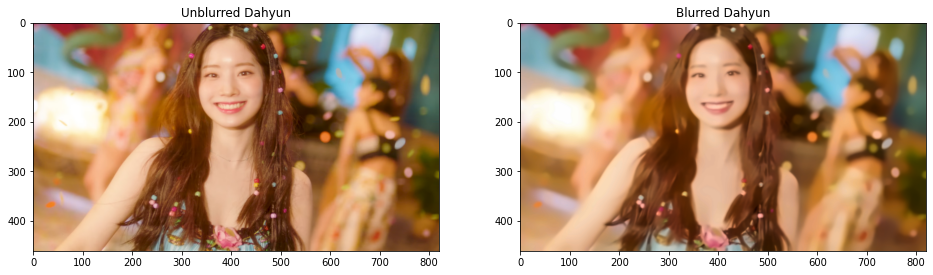

In [14]:
image1 = cv.GaussianBlur(image_cvtresult, (3,3), 0)
rgb_dst = cv.fastNlMeansDenoisingColored(image1, None, 10, 10, 7, 21)

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.title('Unblurred Dahyun')
plt.imshow(image_cvtresult)

plt.subplot(122)
plt.title('Blurred Dahyun')
plt.imshow(rgb_dst)

plt.show()